# *Xeus-Octave*: A native Octave kernel for jupyter with advanced visualization

*Xeus-Octave* is an Octave kernel for Jupyter built with Xeus, a C++ framework
for building Jupyter kernels, which means that it is completely native, and does
not run a virtual Octave session in a forked process.

Thanks to its being native, xeus-octave has access to the internal representation
of all Octave objects, and thus it is able to provide advanced visualisation of
many types with ease.

## Native Octave plots

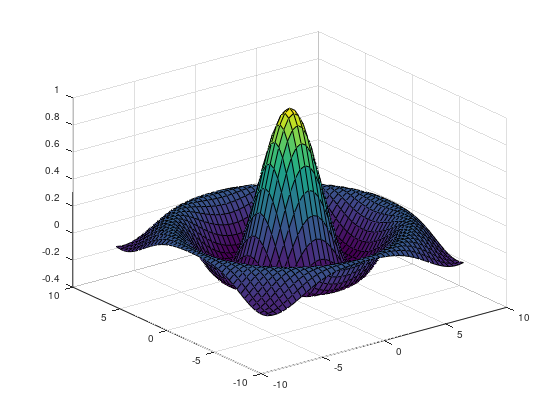

In [20]:
graphics_toolkit("notebook")  % The default
sombrero

## Advanced plots using [Plotly](https://github.com/plotly/plotly.js), with zoom, cursors, and hover tooltips (experimental)

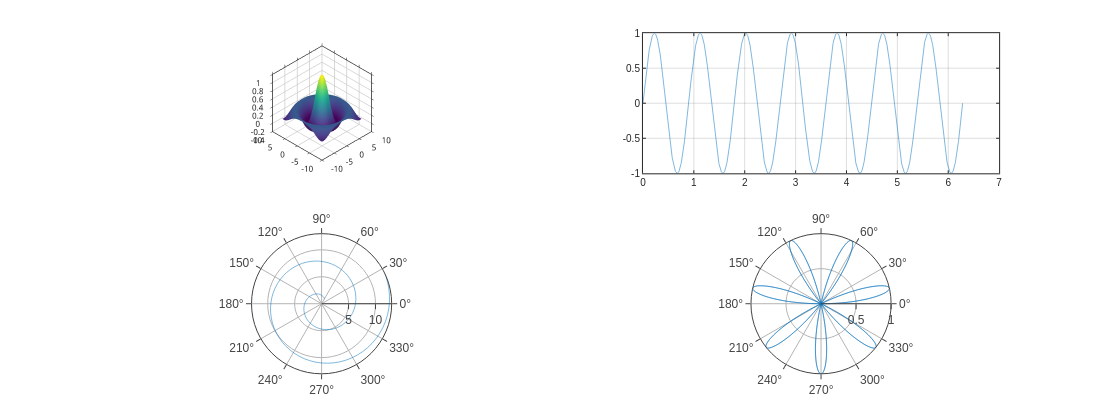

In [21]:
graphics_toolkit("plotly")

a = [1:0.1:13];
theta = linspace (0,2*pi,1000);
rho = sin (7*theta);

subplot(2,2,1);
sombrero()
grid on;
box on;

subplot(2,2,2);
plot(theta, rho);
grid on;
box on;

subplot(2,2,3);
polar(a,a)
grid on;
box on;

subplot(2,2,4);
polar(theta, rho);
grid on;
box on;

## Matrices displayed as tables or $\LaTeX$

In [22]:
disp("A table matrix: \n")
displayformat matrix html;
m = ones(3,3)
disp("\nAnd a latex one:\n")
displayformat matrix latex;
m

A table matrix: 



m,1,2,3
1,1,1,1
2,1,1,1
3,1,1,1



And a latex one:



m =    1   1   1
   1   1   1
   1   1   1


## Structs displayed as interactive tree views

In [23]:
struct(
    "name","Alice",
    "age", 33,
    "knows_octave", true,
    "pets", [
        struct("name", "Rex", "type", "Dog"),
        struct("name", "Felix", "type", "Cat")
    ]
)

ans =     name = Alice
    age = 33
    knows_octave = 1
    pets =

      2x1 struct array containing the fields:

        name
        type



## Symbolic classes displayed in $\LaTeX$

In [ ]:
pkg load symbolic

syms x

f = (sin(x/2))^3 
diff(f, x)

## Input support

In [14]:
name = input("Enter value: ")

Enter value:  "Marina"


name = Marina


## Formatted help 

In [15]:
plot?

‘-’,Use solid lines (default).
‘--’,Use dashed lines.
‘:’,Use dotted lines.
‘-.’,Use dash-dotted lines.
‘+’,crosshair
‘o’,circle
‘*’,star
‘.’,point
‘x’,cross
‘|’,vertical line
‘_’,horizontal line


## Widgets

In [26]:
win = xhbox
win.Children = {figure, xvbox};
win.Children{2}.Children = {xslider, xslider};
win.Children{2}.Children{1}.Description = "Azimuth";
win.Children{2}.Children{1}.Min = -180;
win.Children{2}.Children{1}.Max = 180;
win.Children{2}.Children{2}.Description = "Elevation";
win.Children{2}.Children{2}.Min = -90;
win.Children{2}.Children{2}.Max = 90;

function on_params_changed (widget, win) 
    figure(win.Children{1});
    view(win.Children{2}.Children{1}.Value, win.Children{2}.Children{2}.Value);
    drawnow;
end

win.Children{2}.Children{1}.observe_Value(@on_params_changed, win)
win.Children{2}.Children{2}.observe_Value(@on_params_changed, win)

sombrero;
win.Children{2}.Children{1}.Value = -37.5;
win.Children{2}.Children{2}.Value = 30;

A Jupyter widget

## Example: notch filter

### Parameters

In [27]:
w0 = 2*pi*1000;     % Target frequency
Q = 100;            % Analog selectivity
Tc = 1/50e3;        % Sampling time    

### Filter design

The analog solution has the following transfer function:

In [28]:
pkg load signal
pkg load control

%% Analog solution
s = tf('s');
N = 1+(s/w0)^2;                  
D = 1 + s/(Q*w0) + (s/w0)^2;
F = N/D                          % Analog notch filter                

Continuous-time model.



The discrete solution has the following transfer function:

In [12]:
F_d = c2d(F,Tc,'zoh')            % Discretisation   

Sampling time: 2e-05 s
Discrete-time model.



### Bode diagram

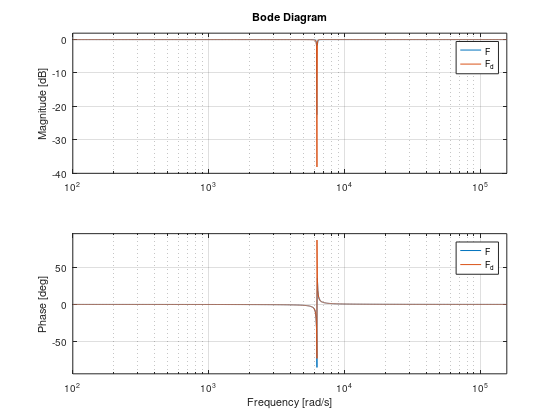

In [13]:
graphics_toolkit("notebook")
bode(F,F_d);
legend("F", "F_d")